In [ ]:
!git clone https://github.com/thibui0908/Twitter-Bot-Detection.git

Cloning into 'Twitter-Bot-Detection'...
remote: Enumerating objects: 5419, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 5419 (delta 1), reused 1 (delta 0), pack-reused 5412
Receiving objects: 100% (5419/5419), 1.66 GiB | 27.66 MiB/s, done.
Resolving deltas: 100% (63/63), done.
Checking out files: 100% (2676/2676), done.


In [ ]:
!pip3 install networkit
import networkit as nk
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.1 MB/s 


In [ ]:
import os
import csv
import re

## Graph classification

graph_classification = {}
isBot = True
bot = 1
real = 2
node_labels = {}
count = 1
graph_number = 1
graph_edges = {}

graph_classification = {}

graph_classification[bot] = []
graph_classification[real] = []
directories = ['Twitter-Bot-Detection/data/bot_user_edge/',
               'Twitter-Bot-Detection/data/real_user_edge/']

bot_list = []
real_list = []

def build_graph_edges(edge_list, count):
  for edge in edge_list:
    source = int(edge[0])
    target = int(edge[1])
    if source not in node_labels:
      node_labels[source] = count
      count += 1
    if node_labels[source] not in graph_edges:
      graph_edges[node_labels[source]] = set()
    else:
      if target not in node_labels:
        node_labels[target] = count
        count += 1
      graph_edges[node_labels[source]].add(node_labels[target])
  return count

FILE_LIMIT = 500

for directory in directories:
  isBot = True if directory == 'Twitter-Bot-Detection/data/bot_user_edge/' else False
  print('directory: ', directory, 'bot: ', isBot)
  count_file = 0
  for file in [file for file in os.listdir(directory) if file.endswith('.csv')]:
    if count_file == FILE_LIMIT:
      break
    with open(directory + file, 'r') as csv_file:
      edge_reader = csv.reader(csv_file)
      edge_list = list(edge_reader)
      graph_edges = {}
      count = build_graph_edges(edge_list, count)
      if isBot:
        graph_classification[bot].append([graph_number, graph_edges])
      else:
        graph_classification[real].append([graph_number, graph_edges])
      graph_number += 1
    count_file += 1
    if count_file%40==0: 
      print("Reached file #", count_file)

directory:  Twitter-Bot-Detection/data/bot_user_edge/ bot:  True
Reached file # 40
Reached file # 80
Reached file # 120
Reached file # 160
Reached file # 200
Reached file # 240
Reached file # 280
Reached file # 320
Reached file # 360
Reached file # 400
Reached file # 440
Reached file # 480
directory:  Twitter-Bot-Detection/data/real_user_edge/ bot:  False
Reached file # 40
Reached file # 80
Reached file # 160
Reached file # 200
Reached file # 240
Reached file # 280
Reached file # 320
Reached file # 360
Reached file # 400
Reached file # 440
Reached file # 480


In [ ]:
print(graph_number)
print(count)
print(len(node_labels))

1001
19727143
19727142


In [ ]:
import numpy as np
import pickle as pk

In [ ]:
with open('saved_dictionary.pkl', 'wb') as f:
    pk.dump(graph_classification, f)

In [ ]:
with open('saved_dictionary.pkl', 'rb') as f:
    graph_classification = pk.load(f)

In [ ]:
node_labels_new = {}
count = 1

for classification in graph_classification.keys():
  for graph_list in graph_classification[classification]:
    graph_edges = graph_list[1]
    for source in graph_edges.keys():
      for target in graph_edges[source]:
        if classification == 2:
          if source not in node_labels_new:
            node_labels_new[source] = count
            count += 1
          if target not in node_labels_new:
            node_labels_new[target] = count
            count += 1

In [ ]:
real_edges = []
for classification in graph_classification.keys():
  for graph_list in graph_classification[classification]:
    graph_edges = graph_list[1]
    for source in graph_edges.keys():
      for target in graph_edges[source]:
        if classification == 2:
          real_edges.append([node_labels_new[source], node_labels_new[target]])

In [ ]:
print(len(real_edges))

29897371


In [ ]:
!pip3 install networkit
import networkit as nk
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
G_Fake = nk.Graph()
G_Real = nk.Graph()
for classification in graph_classification.keys():
  for graph_list in graph_classification[classification]:
    graph_edges = graph_list[1]
    for source in graph_edges.keys():
      for target in graph_edges[source]:
        if classification == 1:
          G_Fake.addEdge(source, target, addMissing = True)
        else:
          G_Real.addEdge(node_labels_new[source], node_labels_new[target], addMissing = True)

In [ ]:
print('------------------------------------------------')
print('Overview of Bot Graph:')
print('------------------------------------------------')
nk.overview(G_Fake)
print('------------------------------------------------')
print('Overview of Real User Graph:')
print('------------------------------------------------')
nk.overview(G_Real)

------------------------------------------------
Overview of Bot Graph:
------------------------------------------------
Network Properties:
nodes, edges			5104703, 8025280
directed?			False
weighted?			False
isolated nodes			4
self-loops			18
density				0.000001
min/max/avg degree		0, 10094, 3.144266
degree assortativity		-0.556486
number of connected components	16
size of largest component	5104601 (100.00 %)
------------------------------------------------
Overview of Real User Graph:
------------------------------------------------
Network Properties:
nodes, edges			16683681, 29897371
directed?			False
weighted?			False
isolated nodes			1
self-loops			9
density				0.000000
min/max/avg degree		0, 30007, 3.584025
degree assortativity		-0.374393
number of connected components	6
size of largest component	16683639 (100.00 %)


In [ ]:
print('------------------------------------------------')
print('Bot community detection:')
print('------------------------------------------------')
communities_fake = nk.community.detectCommunities(G_Fake)
print('------------------------------------------------')
print('Real user community detection:')
print('------------------------------------------------')
communities_real = nk.community.detectCommunities(G_Real)

------------------------------------------------
Bot community detection:
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/networkit/stopwatch.py:49: UserWarning: networkit.Timer is deprecated, will be removed in future updates.
  warn("networkit.Timer is deprecated, will be removed in future updates.")


Communities detected in 3.18414 [s]
solution properties:
-------------------  --------------
# communities            94
min community size        1
max community size   424309
avg. community size   54305.4
imbalance                 7.8133
edge cut             782560
edge cut (portion)        0.0975119
modularity                0.849274
-------------------  --------------
------------------------------------------------
Real user community detection:
------------------------------------------------
Communities detected in 16.57909 [s]
solution properties:
-------------------  ----------------
# communities            75
min community size        1
max community size        1.40335e+06
avg. community size  222449
imbalance                 6.30862
edge cut                  4.273e+06
edge cut (portion)        0.142922
modularity                0.813578
-------------------  ----------------


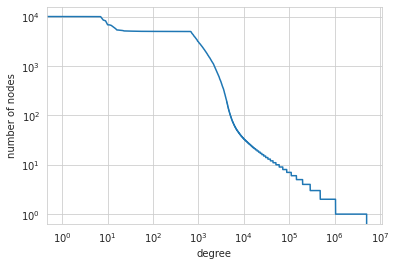

In [ ]:
#degree distribution
dd = sorted(nk.centrality.DegreeCentrality(G_Fake).run().scores(), reverse=True)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(dd)
plt.show()

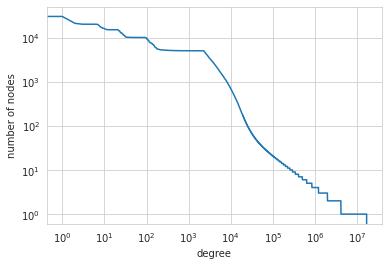

In [ ]:
dd = sorted(nk.centrality.DegreeCentrality(G_Real).run().scores(), reverse=True)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(dd)
plt.show()

In [ ]:
b = []
c = []
nodes = {}

for classification in graph_classification.keys():
  for graph_list in graph_classification[classification]:
    a = []
    graph_edges = graph_list[1]
    edges = set()
    n = {}
    labeled_edges = {}
    for source in graph_edges.keys():
      for target in graph_edges[source]:
        if source not in nodes:
          n[source] = classification
        if target not in nodes:
          n[target] = classification
        edges.add((source, target))
        labeled_edges[(source, target)] = classification
    if len(edges) != 0:
      a.append(edges)
      a.append(n)
      a.append(labeled_edges)
      c.append(a)
      b.append(classification)

USER = {}
USER['data'] = c
USER['target'] = b

In [ ]:
G = USER['data']
y = USER['target']
G = np.asarray(G)
y = np.asarray(y)
print(G.ndim)
print(y.ndim)
print(type(G[1][1]))
print(len(G))
print(G[0])
print(len(y))

2
1
<class 'dict'>
990
[{(1, 34), (1, 149), (1, 259), (1, 108), (1, 215), (1, 154), (1, 17), (1, 196), (1, 143), (1, 83), (1, 6), (1, 201), (1, 188), (1, 64), (1, 11), (1, 254), (1, 161), (1, 276), (1, 117), (1, 56), (1, 227), (1, 281), (1, 122), (1, 45), (1, 144), (1, 270), (1, 111), (1, 210), (1, 133), (1, 28), (1, 199), (1, 138), (1, 94), (1, 244), (1, 191), (1, 67), (1, 54), (1, 249), (1, 172), (1, 279), (1, 112), (1, 59), (1, 238), (1, 260), (1, 101), (1, 40), (1, 147), (1, 265), (1, 106), (1, 221), (1, 128), (1, 84), (1, 31), (1, 194), (1, 181), (1, 89), (1, 12), (1, 247), (1, 186), (1, 78), (1, 49), (1, 228), (1, 175), (1, 274), (1, 115), (1, 38), (1, 233), (1, 263), (1, 96), (1, 43), (1, 158), (1, 21), (1, 216), (1, 131), (1, 87), (1, 26), (1, 205), (1, 176), (1, 68), (1, 15), (1, 242), (1, 165), (1, 73), (1, 60), (1, 231), (1, 170), (1, 126), (1, 33), (1, 148), (1, 258), (1, 99), (1, 214), (1, 153), (1, 16), (1, 219), (1, 142), (1, 82), (1, 5), (1, 200), (1, 179), (1, 71), (1,

In [ ]:
import csv

G_bot = nk.Graph()
G_real = nk.Graph()

bot = 0
real = 0

for i in range(len(G)):
  if bot + real == 2:
    break
  if len(G[i][0]) < 4500:
    if y[i] == 1 and bot == 0 and len(G[i][0]) > (len(G[i][1]) + 300):
      with open('bot_example.csv', 'w') as f:
        writer = csv.writer(f)
        for u in G[i][0]:
          l = list(u)       
          G_bot.addEdge(l[0], l[1], addMissing=True)
          writer.writerow(u)
      bot = 1
      print('found bot')
      print(len(G[i][0]))
      print(len(G[i][1]))
    if y[i] == 2 and real == 0 and len(G[i][0]) > (len(G[i][1]) + 300):
      with open('real_example.csv', 'w') as f:
        writer = csv.writer(f)
        for u in G[i][0]:
          l = list(u)       
          G_bot.addEdge(l[0], l[1], addMissing=True)
          writer.writerow(u)
      real = 1
      print('found real')
      print(len(G[i][0]))
      print(len(G[i][1]))

found bot
4130
3794
found real
3550
3208


In [ ]:
print('------------------------------------------------')
print('Overview of Bot Graph:')
print('------------------------------------------------')
nk.overview(G_bot)
print('------------------------------------------------')
print('Overview of Real User Graph:')
print('------------------------------------------------')
nk.overview(G_real)

------------------------------------------------
Overview of Bot Graph:
------------------------------------------------
Network Properties:
nodes, edges			1857994, 4130
directed?			False
weighted?			False
isolated nodes			1854200
self-loops			0
density				0.000000
clustering coefficient		0.000237
min/max/avg degree		0, 1145, 0.004446
degree assortativity		-0.612449
number of connected components	1854201
size of largest component	3794 (0.20 %)
------------------------------------------------
Overview of Real User Graph:
------------------------------------------------
Network Properties:
nodes, edges			5474533, 3550
directed?			False
weighted?			False
isolated nodes			5471325
self-loops			0
density				0.000000
clustering coefficient		0.000124
min/max/avg degree		0, 2169, 0.001297
degree assortativity		-0.744063
number of connected components	5471326
size of largest component	3208 (0.06 %)
